<h1 style="text-align: center;">Deep Learning<br><br>Session - 4<br><br>Classification with ANN<br><br>Cancer Data<br><h1>

# Keras Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
len(cancer["feature_names"])

30

In [10]:
cancer["data"]

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [11]:
len(cancer["data"])

569

In [14]:
cancer["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [15]:
len(cancer["target"])

569

In [12]:
cc_feat = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
cc_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [13]:
cc_feat.shape

(569, 30)

In [26]:
cc_target = pd.DataFrame(cancer["target"], columns=["cancer"])
cc_target.head()

,cancer
0,0
1,0
2,0
3,0
4,0


In [27]:
cc_target.sample(5)

,cancer
459,1
154,1
251,1
475,1
112,1


In [28]:
cc = pd.concat([cc_feat, cc_target], axis=1)
cc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,0


In [29]:
cc.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
456,11.630,29.290,74.870,415.100,0.094,0.086,0.072,0.020,0.180,0.062,0.314,2.426,2.150,23.130,0.010,0.024,0.043,0.009,0.025,0.002,13.120,38.810,86.040,527.800,0.141,0.203,0.292,0.068,0.288,0.072,1
231,11.320,27.080,71.760,395.700,0.069,0.038,0.016,0.003,0.187,0.056,0.121,0.893,1.059,8.605,0.004,0.016,0.016,0.003,0.015,0.002,12.080,33.750,79.820,452.300,0.092,0.143,0.109,0.021,0.285,0.071,1
234,9.567,15.910,60.210,279.600,0.085,0.041,0.017,0.017,0.155,0.064,0.215,0.830,1.215,12.640,0.012,0.010,0.012,0.010,0.024,0.004,10.510,19.160,65.740,335.900,0.150,0.095,0.072,0.072,0.276,0.082,1
38,14.990,25.200,95.540,698.800,0.094,0.051,0.024,0.029,0.157,0.055,1.214,2.188,8.077,106.000,0.007,0.011,0.018,0.019,0.008,0.002,14.990,25.200,95.540,698.800,0.094,0.051,0.024,0.029,0.157,0.055,0
542,14.740,25.420,94.700,668.600,0.083,0.072,0.041,0.030,0.184,0.057,0.303,1.385,2.177,27.410,0.005,0.012,0.019,0.013,0.019,0.003,16.510,32.290,107.400,826.400,0.106,0.138,0.161,0.110,0.272,0.070,1


## Exploratory Data Analysis and Visualization

In [30]:
cc.shape

(569, 31)

In [31]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [32]:
cc.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean fractal dimension,569.000,0.063,0.007,0.050,0.058,0.062,0.066,0.097


In [36]:
cc["cancer"].value_counts()

1    357
0    212
Name: cancer, dtype: int64

<AxesSubplot:xlabel='cancer', ylabel='count'>

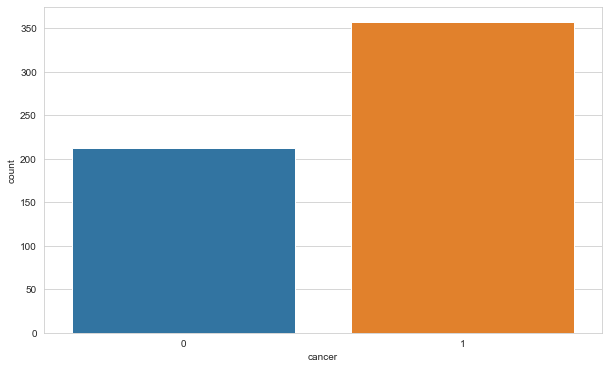

In [37]:
sns.countplot(cc["cancer"])

<AxesSubplot:>

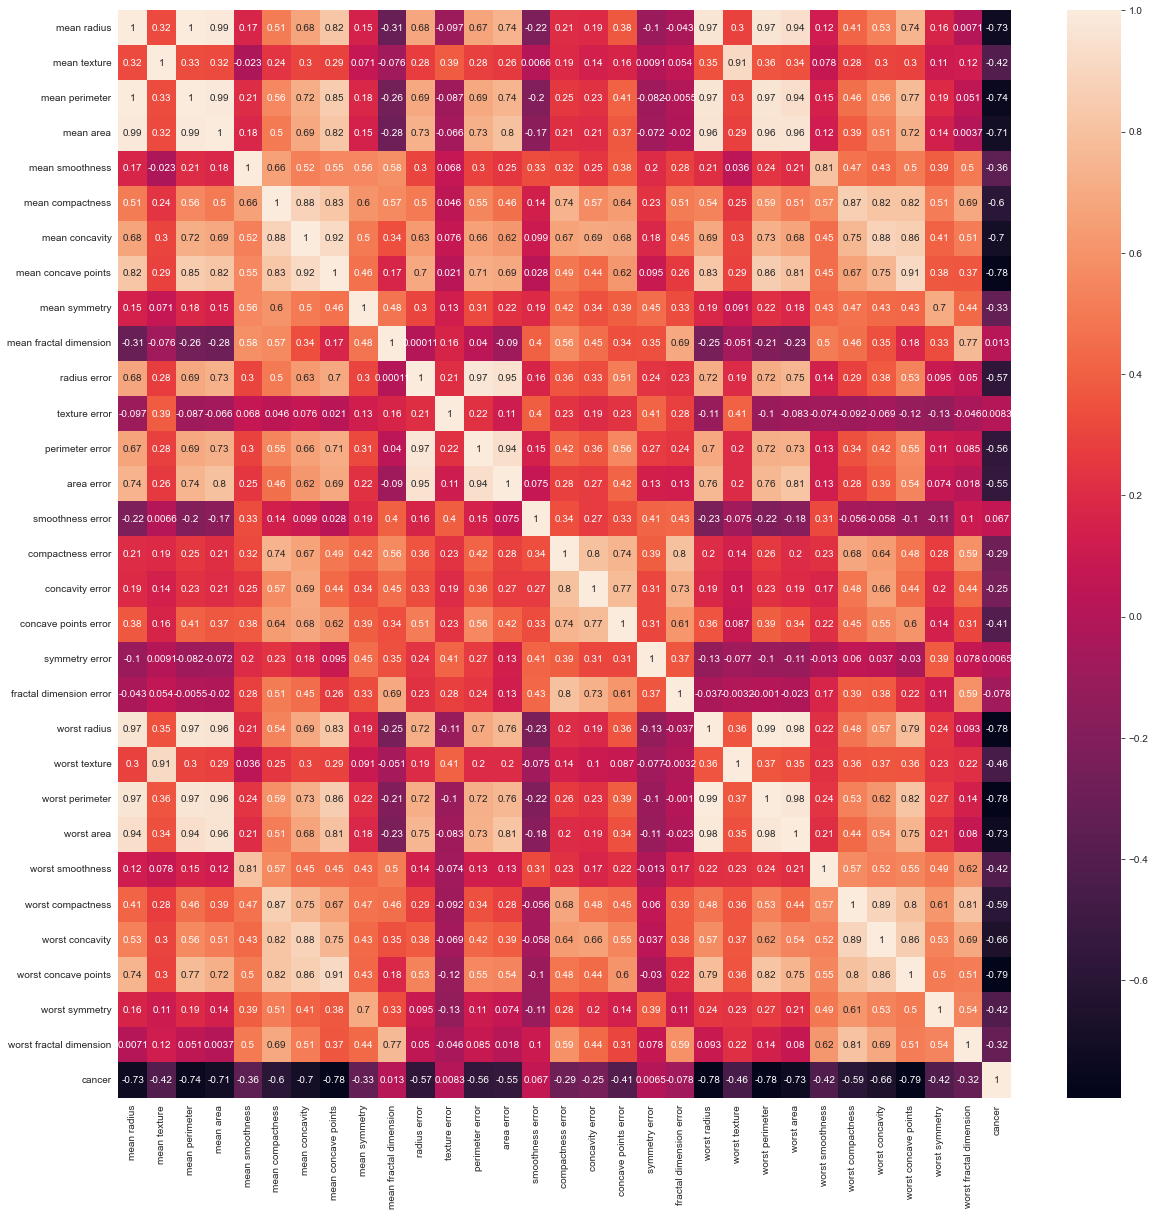

In [38]:
plt.figure(figsize=(20, 20))
sns.heatmap(cc.corr(), annot=True)

In [39]:
drop_list = ["worst perimeter", "worst area", "perimeter error", "area error", "mean perimeter", "mean area"]

In [40]:
cc = cc.drop(drop_list, axis=1)

In [41]:
cc.shape

(569, 25)

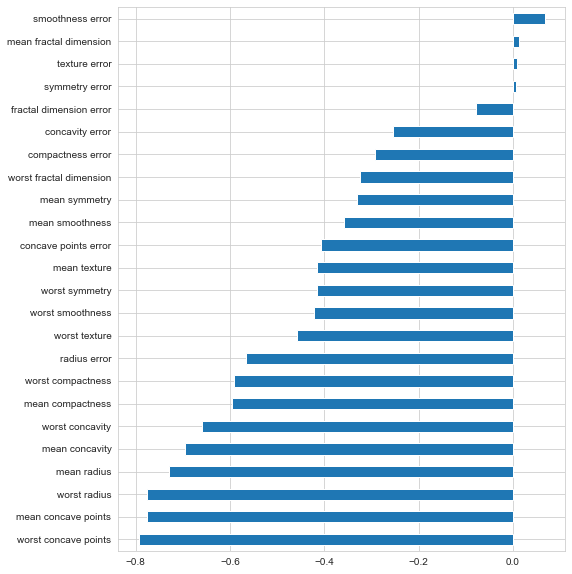

In [43]:
plt.figure(figsize = (8,10))
cc.corr()['cancer'].sort_values().drop("cancer").plot(kind = "barh");

## Preprocessing of Data
- Train | Test Split, Scalling

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [45]:
X = cc.drop("cancer", axis=1)
y = cc["cancer"]

In [46]:
seed = 101

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.1, random_state=seed)

In [48]:
scaler = MinMaxScaler()

In [49]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

2022-10-04 00:28:38.074129: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [51]:
X_train.shape

(512, 24)

In [52]:
X_test.shape

(57, 24)

In [55]:
# IOT stabilize seed

seed = 101
import numpy as np
import tensorflow as tf
import random as python_random

def reset_seeds():
   np.random.seed(seed) 
   python_random.seed(seed)
   tf.random.set_seed(seed)

# reset_seeds

__- The KEY of the question, VERY IMPORTANT, is to call the function reset_seeds() every time before running the model. Doing that you will obtain reproducible results__

In [56]:
reset_seeds() 
model = Sequential()
model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

2022-10-04 00:42:05.545932: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [57]:
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1)

Epoch 1/1000
15/15 [==============================] - 1s 28ms/step - loss: 0.6901 - accuracy: 0.5457 - val_loss: 0.6679 - val_accuracy: 0.6731
Epoch 2/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.6600 - accuracy: 0.6370 - val_loss: 0.6410 - val_accuracy: 0.7308
Epoch 3/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6266 - accuracy: 0.7261 - val_loss: 0.6045 - val_accuracy: 0.8077
Epoch 4/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.5849 - accuracy: 0.7565 - val_loss: 0.5574 - val_accuracy: 0.8654
Epoch 5/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.5242 - accuracy: 0.8435 - val_loss: 0.4757 - val_accuracy: 0.9231
Epoch 6/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.4371 - accuracy: 0.9043 - val_loss: 0.3916 - val_accuracy: 0.9231
Epoch 7/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.3501 - accuracy: 0.9261 - val_loss: 0.3112 - val_accuracy: 0.9423
Epoch

15/15 [==============================] - 0s 5ms/step - loss: 0.0413 - accuracy: 0.9848 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 116/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0459 - accuracy: 0.9804 - val_loss: 0.0366 - val_accuracy: 0.9808
Epoch 117/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0409 - accuracy: 0.9848 - val_loss: 0.0277 - val_accuracy: 0.9808
Epoch 118/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0447 - accuracy: 0.9870 - val_loss: 0.0551 - val_accuracy: 0.9808
Epoch 119/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0522 - accuracy: 0.9848 - val_loss: 0.0314 - val_accuracy: 0.9808
Epoch 120/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0537 - accuracy: 0.9761 - val_loss: 0.0431 - val_accuracy: 0.9808
Epoch 121/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0473 - accuracy: 0.9826 - val_loss: 0.0358 - val_accuracy: 0.9808
Epoch 1

Epoch 172/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0324 - accuracy: 0.9870 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 173/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0370 - accuracy: 0.9826 - val_loss: 0.0335 - val_accuracy: 0.9808
Epoch 174/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 0.9848 - val_loss: 0.0611 - val_accuracy: 0.9808
Epoch 175/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0406 - accuracy: 0.9848 - val_loss: 0.0287 - val_accuracy: 0.9808
Epoch 176/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0313 - accuracy: 0.9848 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 177/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0394 - accuracy: 0.9870 - val_loss: 0.0403 - val_accuracy: 0.9808
Epoch 178/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0428 - accuracy: 0.9826 - val_loss: 0.0507 - val_accuracy:

Epoch 229/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0247 - accuracy: 0.9870 - val_loss: 0.0255 - val_accuracy: 0.9808
Epoch 230/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0252 - accuracy: 0.9891 - val_loss: 0.0286 - val_accuracy: 0.9808
Epoch 231/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 232/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0256 - accuracy: 0.9870 - val_loss: 0.0335 - val_accuracy: 0.9808
Epoch 233/1000
15/15 [==============================] - 0s 12ms/step - loss: 0.0310 - accuracy: 0.9891 - val_loss: 0.0257 - val_accuracy: 0.9808
Epoch 234/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0315 - val_accuracy: 0.9808
Epoch 235/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9848 - val_loss: 0.0314 - val_accuracy

Epoch 286/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0264 - accuracy: 0.9891 - val_loss: 0.0376 - val_accuracy: 0.9808
Epoch 287/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0217 - accuracy: 0.9913 - val_loss: 0.0245 - val_accuracy: 0.9808
Epoch 288/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0235 - accuracy: 0.9891 - val_loss: 0.0270 - val_accuracy: 0.9808
Epoch 289/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0214 - accuracy: 0.9891 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 290/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0319 - accuracy: 0.9870 - val_loss: 0.0306 - val_accuracy: 0.9808
Epoch 291/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0279 - accuracy: 0.9870 - val_loss: 0.0468 - val_accuracy: 0.9808
Epoch 292/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0250 - val_accuracy:

Epoch 343/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0344 - accuracy: 0.9848 - val_loss: 0.0247 - val_accuracy: 0.9808
Epoch 344/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 0.9870 - val_loss: 0.0286 - val_accuracy: 0.9808
Epoch 345/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0380 - accuracy: 0.9848 - val_loss: 0.0288 - val_accuracy: 0.9808
Epoch 346/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0230 - accuracy: 0.9848 - val_loss: 0.0287 - val_accuracy: 0.9808
Epoch 347/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0203 - accuracy: 0.9913 - val_loss: 0.0311 - val_accuracy: 0.9808
Epoch 348/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.9913 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 349/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0194 - accuracy: 0.9870 - val_loss: 0.0380 - val_accuracy:

Epoch 400/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0151 - accuracy: 0.9913 - val_loss: 0.0273 - val_accuracy: 0.9808
Epoch 401/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9935 - val_loss: 0.0262 - val_accuracy: 0.9808
Epoch 402/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0153 - accuracy: 0.9913 - val_loss: 0.0426 - val_accuracy: 0.9808
Epoch 403/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0142 - accuracy: 0.9957 - val_loss: 0.0250 - val_accuracy: 0.9808
Epoch 404/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0138 - accuracy: 0.9935 - val_loss: 0.0311 - val_accuracy: 0.9808
Epoch 405/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0147 - accuracy: 0.9935 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 406/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0196 - accuracy: 0.9913 - val_loss: 0.0318 - val_accuracy:

Epoch 457/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0170 - accuracy: 0.9913 - val_loss: 0.0837 - val_accuracy: 0.9808
Epoch 458/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0195 - accuracy: 0.9957 - val_loss: 0.0441 - val_accuracy: 0.9808
Epoch 459/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0159 - accuracy: 0.9935 - val_loss: 0.0440 - val_accuracy: 0.9808
Epoch 460/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0103 - accuracy: 0.9935 - val_loss: 0.0332 - val_accuracy: 0.9808
Epoch 461/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0095 - accuracy: 0.9935 - val_loss: 0.0481 - val_accuracy: 0.9808
Epoch 462/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0124 - accuracy: 0.9935 - val_loss: 0.0417 - val_accuracy: 0.9808
Epoch 463/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0159 - accuracy: 0.9891 - val_loss: 0.0534 - val_accuracy:

Epoch 514/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0083 - accuracy: 0.9957 - val_loss: 0.0391 - val_accuracy: 0.9808
Epoch 515/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0557 - val_accuracy: 0.9808
Epoch 516/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0098 - accuracy: 0.9957 - val_loss: 0.0595 - val_accuracy: 0.9808
Epoch 517/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0099 - accuracy: 0.9957 - val_loss: 0.0480 - val_accuracy: 0.9808
Epoch 518/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.0409 - val_accuracy: 0.9808
Epoch 519/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0107 - accuracy: 0.9957 - val_loss: 0.0500 - val_accuracy: 0.9615
Epoch 520/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0175 - accuracy: 0.9913 - val_loss: 0.0827 - val_accuracy:

Epoch 571/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0492 - val_accuracy: 0.9808
Epoch 572/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0797 - val_accuracy: 0.9808
Epoch 573/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0665 - val_accuracy: 0.9808
Epoch 574/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0501 - val_accuracy: 0.9615
Epoch 575/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0805 - val_accuracy: 0.9808
Epoch 576/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0058 - accuracy: 0.9978 - val_loss: 0.0512 - val_accuracy: 0.9808
Epoch 577/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0678 - val_accuracy:

Epoch 628/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9808
Epoch 629/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 0.9808
Epoch 630/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0829 - val_accuracy: 0.9808
Epoch 631/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0552 - val_accuracy: 0.9808
Epoch 632/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0799 - val_accuracy: 0.9808
Epoch 633/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0590 - val_accuracy: 0.9808
Epoch 634/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0836 - val_accuracy:

Epoch 685/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0650 - val_accuracy: 0.9615
Epoch 686/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0096 - accuracy: 0.9957 - val_loss: 0.0613 - val_accuracy: 0.9808
Epoch 687/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1086 - val_accuracy: 0.9808
Epoch 688/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0655 - val_accuracy: 0.9808
Epoch 689/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0813 - val_accuracy: 0.9808
Epoch 690/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0825 - val_accuracy: 0.9808
Epoch 691/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0685 - val_accuracy:

Epoch 742/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0949 - val_accuracy: 0.9808
Epoch 743/1000
15/15 [==============================] - 0s 5ms/step - loss: 9.0465e-04 - accuracy: 1.0000 - val_loss: 0.0980 - val_accuracy: 0.9808
Epoch 744/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.6494e-04 - accuracy: 1.0000 - val_loss: 0.0996 - val_accuracy: 0.9808
Epoch 745/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.8803e-04 - accuracy: 1.0000 - val_loss: 0.0986 - val_accuracy: 0.9808
Epoch 746/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.3802e-04 - accuracy: 1.0000 - val_loss: 0.1012 - val_accuracy: 0.9808
Epoch 747/1000
15/15 [==============================] - 0s 5ms/step - loss: 8.6912e-04 - accuracy: 1.0000 - val_loss: 0.0991 - val_accuracy: 0.9808
Epoch 748/1000
15/15 [==============================] - 0s 4ms/step - loss: 8.6302e-04 - accuracy: 1.0000 - val_loss

15/15 [==============================] - 0s 6ms/step - loss: 3.3959e-04 - accuracy: 1.0000 - val_loss: 0.1218 - val_accuracy: 0.9808
Epoch 853/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.8775e-04 - accuracy: 1.0000 - val_loss: 0.1365 - val_accuracy: 0.9808
Epoch 854/1000
15/15 [==============================] - 0s 5ms/step - loss: 4.1903e-04 - accuracy: 1.0000 - val_loss: 0.1266 - val_accuracy: 0.9808
Epoch 855/1000
15/15 [==============================] - 0s 6ms/step - loss: 3.3701e-04 - accuracy: 1.0000 - val_loss: 0.1282 - val_accuracy: 0.9808
Epoch 856/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.1977e-04 - accuracy: 1.0000 - val_loss: 0.1285 - val_accuracy: 0.9808
Epoch 857/1000
15/15 [==============================] - 0s 6ms/step - loss: 3.2525e-04 - accuracy: 1.0000 - val_loss: 0.1288 - val_accuracy: 0.9808
Epoch 858/1000
15/15 [==============================] - 0s 5ms/step - loss: 3.2282e-04 - accuracy: 1.0000 - val_loss: 0.1277 - 

15/15 [==============================] - 0s 5ms/step - loss: 5.2899e-04 - accuracy: 1.0000 - val_loss: 0.1455 - val_accuracy: 0.9615
Epoch 964/1000
15/15 [==============================] - 0s 6ms/step - loss: 5.1958e-04 - accuracy: 1.0000 - val_loss: 0.1479 - val_accuracy: 0.9615
Epoch 965/1000
15/15 [==============================] - 0s 5ms/step - loss: 5.1857e-04 - accuracy: 1.0000 - val_loss: 0.1481 - val_accuracy: 0.9615
Epoch 966/1000
15/15 [==============================] - 0s 5ms/step - loss: 5.0219e-04 - accuracy: 1.0000 - val_loss: 0.1486 - val_accuracy: 0.9615
Epoch 967/1000
15/15 [==============================] - 0s 7ms/step - loss: 6.2158e-04 - accuracy: 1.0000 - val_loss: 0.1428 - val_accuracy: 0.9615
Epoch 968/1000
15/15 [==============================] - 0s 5ms/step - loss: 5.8660e-04 - accuracy: 1.0000 - val_loss: 0.1552 - val_accuracy: 0.9615
Epoch 969/1000
15/15 [==============================] - 0s 10ms/step - loss: 4.9080e-04 - accuracy: 1.0000 - val_loss: 0.1463 -

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                900       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,747
Trainable params: 1,747
Non-trainable params: 0
_________________________________________________________________


In [59]:
loss_cc = pd.DataFrame(model.history.history)
loss_cc.head()

,loss,accuracy,val_loss,val_accuracy
0,0.690,0.546,0.668,0.673
1,0.660,0.637,0.641,0.731
2,0.627,0.726,0.604,0.808
3,0.585,0.757,0.557,0.865
4,0.524,0.843,0.476,0.923


In [61]:
loss_cc["loss"].sort_values(ascending=True)

909   0.000
908   0.000
902   0.000
896   0.000
903   0.000
       ... 
4     0.524
3     0.585
2     0.627
1     0.660
0     0.690
Name: loss, Length: 1000, dtype: float64

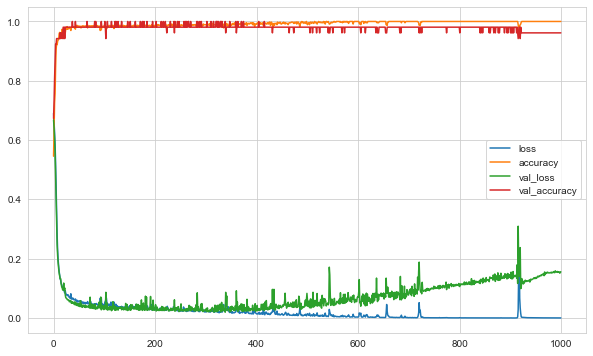

In [60]:
loss_cc.plot();

In [62]:
model.evaluate(X_test, y_test, verbose=0)

[0.382569819688797, 0.9649122953414917]

In [63]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.382569819688797
accuracy :  0.9649122953414917


In [64]:
y_pred = model.predict(X_test) > 0.5

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 3ms/step
[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



### EarlyStopping

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
reset_seeds()
model = Sequential()
model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [68]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [69]:
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1, callbacks=[early_stop])

Epoch 1/1000
15/15 [==============================] - 1s 20ms/step - loss: 0.6901 - accuracy: 0.5457 - val_loss: 0.6679 - val_accuracy: 0.6731
Epoch 2/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6600 - accuracy: 0.6370 - val_loss: 0.6410 - val_accuracy: 0.7308
Epoch 3/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.6266 - accuracy: 0.7261 - val_loss: 0.6045 - val_accuracy: 0.8077
Epoch 4/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.5849 - accuracy: 0.7565 - val_loss: 0.5574 - val_accuracy: 0.8654
Epoch 5/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.5242 - accuracy: 0.8435 - val_loss: 0.4757 - val_accuracy: 0.9231
Epoch 6/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.4371 - accuracy: 0.9043 - val_loss: 0.3916 - val_accuracy: 0.9231
Epoch 7/1000
15/15 [==============================] - 0s 10ms/step - loss: 0.3501 - accuracy: 0.9261 - val_loss: 0.3112 - val_accuracy: 0.9423
Ep

15/15 [==============================] - 0s 5ms/step - loss: 0.0413 - accuracy: 0.9848 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 116/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0459 - accuracy: 0.9804 - val_loss: 0.0366 - val_accuracy: 0.9808
Epoch 117/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0409 - accuracy: 0.9848 - val_loss: 0.0277 - val_accuracy: 0.9808
Epoch 118/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0447 - accuracy: 0.9870 - val_loss: 0.0551 - val_accuracy: 0.9808
Epoch 119/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.0522 - accuracy: 0.9848 - val_loss: 0.0314 - val_accuracy: 0.9808
Epoch 120/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.0537 - accuracy: 0.9761 - val_loss: 0.0431 - val_accuracy: 0.9808
Epoch 121/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.0473 - accuracy: 0.9826 - val_loss: 0.0358 - val_accuracy: 0.9808
Epoch 1

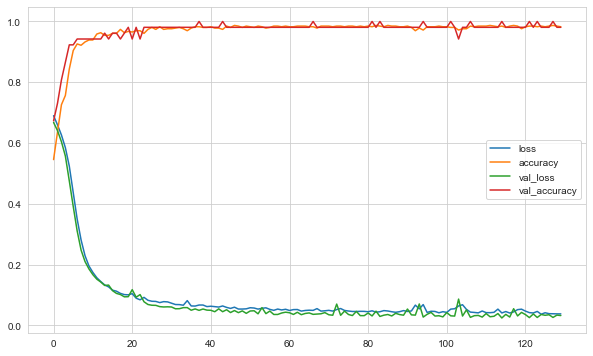

In [70]:
loss_cc = pd.DataFrame(model.history.history)
loss_cc.plot();

In [71]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.10744638741016388
accuracy :  0.9824561476707458


In [72]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 4ms/step
[[20  1]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.99        36

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



### learning_rate

In [1]:
from tensoflow.keras.optimizers import Adam 

ModuleNotFoundError: No module named 'tensoflow'

In [ ]:
reset_seeds()
model = Sequential()
model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(18, activation="relu"))
model.add(Dense(9, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy, metrics=["accuracy"])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [ ]:
model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=32, epochs=1000, verbose=1,
          callbacks=[early_stop])


In [ ]:
loss_cc = pd.DataFrame(model.history.history)
loss_cc.plot();

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

In [ ]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Dropout